   # *From Tweet to Thunder* - Is Trump Irrational?

## Inquiry into whether weather-related mood-swings explain Trump's seemingly irrational use of Twitter

*Norbert Monti - Data Bootcamp Final Project - Spring 2017*

The purpose of this project is to look at how President Donald Trump has been using his twitter account since he assumed presidency and understand whether there is some "behavioural" component in his tweeting habits. To do this, I will look at weather patterns over the duration of his presidency. Since weather affects people's mood, it could be possible that Trump's mood changes with the weather, and this is reflected in his tweets. 

## Introduction

Donald Trump has been an active user of Twitter and his "enthusiasm" for using the platform has not died down since assuming the presidency. The fact that he still uses Twitter as a major platform for communication has also drawn the attention of media. And while it is know that his tweets can [swing the stock markets and also foreign exchange](http://fortune.com/2017/02/24/trump-tweet-stocks/), there is not a lot of research on how and why Trump chooses to tweet.

On the other hand, Trump has often been described as an unpredictable and irrational ["loose cannon"](http://www.politico.com/story/2016/05/hillary-clinton-loose-cannon-donald-trump-222936). A close reading of his tweets will show that he often uses undiplomatic and harsh comments against what he sees as his opponents, which could be deemed irrational since this showcases a largely unprecedented behaviour from the POTUS. Equally, such behaviour begs the question: is Trump irrational and is he tweeting irrationally?

I will use weather data to look at this "irrational" component of the tweets. To establish that Trump is "irrational", one hypothesis could be that he tweets based on his mood. If he is in a bad mood, he will tweet something negative, and if he is in a good mood, he will tweet something positive. Since we cannot decipher Trump's thoughts, we will have to use another variable that could affect his mood, and one that can be monitored, quantified, as well as exogenous at the same time (that is, the variable itself cannot be explained by the dependent variable, which is his tweets). One variable, which could potentially explain Trump's mood is the weather. The reason for looking at the weather is twofold. It is [established in research](https://psychcentral.com/blog/archives/2014/08/29/can-weather-affect-your-mood/) that weather patterns can change a person's mood. Gloomy, rainy days, or a sunny, clear sky can have a measurable impact on one's motivation, and mood. While this certainly is not the only reason why someone would change their mood, it is a natural, random component, and therefore exogenous.

This research project asks a simple question: does the weather affect Trump's tweeting habits and tone? If it does, we may witness an "irrational" component in his tweeting habits, or in other words, his mood affecting how he expresses himself on Twitter. If there is no link in the data, we cannot fully refute whether Trump is irrational or not, however, we may shed some light on his tweeting habits, and ultimately move on to look more carefully into what predicts and shapes his Twitter account content. Furthermore, if Trump is not irrational in his tweets, it might imply that he is using the platform in a strategic way towards certain purposes beyond expressing his thoughts. And while this latter premise may seem obvious, without inquiring into the subject and providing empirical evidence of either irrationality or rationality, we cannot be sure. 

Finally, this project is not an attempt to be a comprehensive research or account of the true drivers of Trump's tweeting habits but more of an initial look into this subject from a unique angle that probably has not been explored before. Therefore, its conclusions should not be taken *prima facie* but rather should be used as a stepping stone for further inquiry into the 45th POTUS's tweeting patterns and habits.

## Methodology

To carry out the project, I will use two main datasets. Firstly, I will gather data from [Trump's Twitter account](https://twitter.com/realDonaldTrump). The choice of narrowing down the retrieved tweets' dates from the 20th of January to present is twofold. Firstly, Trump's tweets have become "presidential" from this date on, therefore they bear more importance from a domestic and foreign policy perspective. Secondly, Trump's twitter account does not have its geolocation enabled, therefore it is hard to narrow down from where exactly he tweets. Hence, to ensure that we can correctly track Twitter activity with weather, I have to narrow down the weather dataset to Washington DC's weather, since this is the only "stable" place where we know that Trump is on a usual basis (barring his trips to [Mar-A-Lago](https://istrumpatmaralago.org/)). For the weather dataset, I use [Weather Underground's](https://www.wunderground.com/) API.

Furthermore, I will also carry out a "sentiment analysis" of Trump's tweets. [Sentiment analysis](http://text-processing.com/demo/sentiment/) looks at the language of a text and tries to assign a numerical value to the text to reflect what sort of "mood" is represented within. For instance, a very negative text will contain negative words, such as "sad", "useless", "fake", while a positive text would have words such as "happy", "great", and "wonderful". Non-polarizing texts would be reported as neutral. Of course, sentiment analysis is somewhat limited, since it does not pick up on the somewhat more subtle use of words that language allows for, such as irony, sarcasm or mockery. Therefore, conducting a sentiment analysis on Trump's tweets will be more of an assisting tool rather than a definitive answer to the question. In order to truly be able to create a sentiment analysis for these tweets, we would have to build a "Trump-dictionary", which maps out in what contexts he uses certain words and what sort of value those words carry in them, specifically for him. Given the scope of this project, I have not attempted to build such "dictionary", however, I believe that there are an increasing number of reasons to do so in the future. 

To access the datasets, I will use Python's powerful tools, manipulate and clean the data to get to the desired variables. In the subsequent section, I will demonstrate how to get to the dataset that I will use. Then I will present some simple descriptive statistics and graphics to explain the nature of the variables. Finally, I will conduct an OLS regression analysis on the variables. 

The variables I am using are the following:

- **date** - the day when the tweet was tweeted
- **number of tweets** - how many tweets were tweeted a day
- **difference of tweets** - the difference in the number of tweets from one day to the next
- **daily tweet sentiment** - an aggregate of the sentiments of the tweets per day
- **temperature** - daily historical temperature data (daily mean)
- **difference in temperature** - the difference in temperature from one day to the next
- **rain** - binary variable (0 - no rain | 1 - rained)
- **snow** - binary variable (0 - no snow | 1 - snowed)
- **fog** - binary variable (0 - no fog | 1 - foggy)
- **tweets times temperature** - interaction variable between the number of tweets and the temperature

## Data cleaning an manipulation

This section will showcase how I get to the data and how I create the final datasets for data analysis. Since the data retrieved needs considerable manipulation and is not "readily" accessible, this part is quite long.

These are the libraries that need to be accessed with Python. Some of them might not be on your computer, in which case you would have to install them separately through -pip install [name of the library].

In [44]:
import tweepy # we use tweepy to access Twitter and tweets with Python
import pandas as pd # we use pandas to create the dataframe
import requests # we use requests to retrieve weat
import json # some of the data comes in json format hence we need to manipulate it
import matplotlib.pyplot as plt # for plotting
%matplotlib inline
from datetime import datetime as dt # for accurately formatting dates from raw date data
from textblob import TextBlob as tb # used for sentiment analysis ()
import re # used to access a clean tweet text
import numpy as np # we use numpy for some numerical operations and caluclations
import statsmodels.formula.api as sm # for the regression analysis
import seaborn as sns # for more aesthetically pleasing plots
sns.set_style("dark")

## Twitter data

In order to be able to access twitter and tweets, I had to create a twitter account, and a twitter app. This gives us the authentification keys needed by python to access the twitter API.

In [45]:
# access Twitter API through tweepy and custom authentification keys
auth = tweepy.OAuthHandler("YKt8AxjgwhOO50hxisrzrwA0g", "9gm15zbMTvSCpNxDb2ekZ5gH0SncE905l73QyswL4StP80HBzP")
auth.set_access_token("3306512171-2S3L2vhvADaM7IDsKGIzTtOxB6METMiWbkQkfZ7", "AuIos70VzIW9513Zifl5au92HWUVCpUGQELvWl3Q2VtOK")

Here, I just ensure that I am looking at the right data, and that I can access the twitter account I wish to gather data on.

In [46]:
# accessing Twitter data through the authentification keys defined in the previous cell
api = tweepy.API(auth) 
user = api.get_user(id = "realDonaldTrump") # Since I am interested in Trump's tweets, we access his account

# Here I just print out the information on the account to ensure it is the right one
print('Name: ' + user.name)
print('Location: ' + user.location)
print('Friends: ' + str(user.friends_count))

Name: Donald J. Trump
Location: Washington, DC
Friends: 45


I create an empty list texts and date, which will be populated by the text of the tweet and the time when it was tweeted. Tweepy can look for Statuses (tweets) but these are dictionary like objects, hence we want to look for those elements which are relevant for us: this is .text and .created_at. With a for loop, we add these elements to the list. With some manipulation we get the desired variables, and then we turn the lists into Pandas dataframes to later create a larger dataset.

In [47]:
texts = [] # list of tweets
date = [] # list of dates

for i in tweepy.Cursor(api.user_timeline, screen_name="realDonaldTrump").items(): #a loop to add the tweets and dates to lists
    texts.append(str(i.text))
    date.append(str(i.created_at))

In [48]:
# This cell creates two different "date" variables, one which is formatted and one that is "raw".
# The formatted date variable is used to recognize the actual date
# The raw date is used for filtering and data manipulation purposes and will be used to access the weather data later on

date_raw = ([int(i.replace('-', '').split(" ")[0]) for i in date]) 
date_formatted = ([str(i.replace('-', '').split(" ")[0]) for i in date])
date_formatted = [dt.strptime(date, '%Y%m%d').date() for date in date_formatted]

In [49]:
# I create different dataframes using pandas which will contain the text and the date of the tweets

df_texts = pd.DataFrame(texts)
df_date = pd.DataFrame(date_formatted)
df_date_raw = pd.DataFrame(date_raw)

Here I use a few functions that clean up the tweets, as well as create a dataframe for the sentiment of the tweets.

In [50]:
# I use a function which gives us the tweet and gets rid of # and @, as well as urls

def clean_tweet(tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@ #)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [51]:
# I use a function which assigns a sentiment value to each text, where 1 is positive, 0 is neutral, -1 is negative

def get_tweet_sentiment(tweet):
    '''
    Function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
# create TextBlob object of passed tweet text
    analysis = tb(clean_tweet(tweet))
# set sentiment
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [52]:
# First I create a list and add the sentiment values for each tweet, and then turn the list into a dataframe

sentiment = [] # an empty list to be populated with the sentiment values

for tweet in texts:
    sentiment.append(get_tweet_sentiment(tweet))

df_sentiment = pd.DataFrame(sentiment) # the dataframe containing all the sentiment values

In this part I create a "raw" dataframe with all the tweets, their respective dates and sentiment values. At this point, our dataset is large, because it has not been filtered down to the desired date range of tweets (from the 20th of January to present).

In [53]:
frames = [df_texts, df_sentiment, df_date, df_date_raw] # a list of dataframes

df = pd.concat(frames, axis = 1) # concatenate the dataframes to create a larger dataframe
df.columns = ["Tweets", "Sentiment", "Date", "Raw Date"] # Simply renaming the columns

In [54]:
# In this part I select those rows which I use for my analysis (otherwise we'd be looking at too many tweets)
criterion1 = []

for i in date_raw:
    if i > 20170119:
        criterion1.append(i) 

df = df[df["Raw Date"].isin(criterion1)]

And hence we arrive at the first half of the data cleaning. We have the dataset which contains all of Trump's tweets from the day of his presidency. For the sake of completeness, let's check if this is correct:

In [55]:
# Checking the first 5 values and the last 5 values of the dataframe
df.head(5)

,Tweets,Sentiment,Date,Raw Date
0,China just agreed that the U.S. will be allowe...,1,2017-05-12,20170512
1,"When James Clapper himself, and virtually ever...",0,2017-05-12,20170512
2,"James Comey better hope that there are no ""tap...",1,2017-05-12,20170512
3,...Maybe the best thing to do would be to canc...,1,2017-05-12,20170512
4,As a very active President with lots of things...,1,2017-05-12,20170512


In [56]:
df.tail(5)

,Tweets,Sentiment,Date,Raw Date
577,"power from Washington, D.C. and giving it back...",0,2017-01-20,20170120
578,Today we are not merely transferring power fro...,1,2017-01-20,20170120
579,It all begins today! I will see you at 11:00 A...,0,2017-01-20,20170120
580,Thank you for a wonderful evening in Washingto...,1,2017-01-20,20170120
581,Thank you for joining us at the Lincoln Memori...,1,2017-01-20,20170120


I am using the "Raw Date" variable for purposes of building the final dataframe that will join the Twitter data with the weather data. So whilst it might not make sense at the moment to use two "Date" variables, it will come handy later on.

## Weather data

Accessing the weather data is tricky, and requires an API, as well as data manipulation. This section shows how to get to a clean weather data set for the purposes of this project.

In [57]:
# I create a new date list using only those "raw date" rows which correspond to dates after Trump's inauguration 

date_raw_new = [] 

for i in date_raw:
    if i > 20170119:
        date_raw_new.append(i)

This is a crucial part, we want to loop through the historical data for Washington DC for the desired dates. The format of the data is a json object, which is a dictionary-like object. This needs to be further refined so that we can access the dictionaries that are held within, and create new variables from the data contained in the dictionaries.

In [58]:
# I create list of urls for each day of the desired dates

url = []

for i in date_raw_new:
    url.append("http://api.wunderground.com/api/715d2dc362f61cbe/history_{}/q/DC/Washington.json".format(i))

In [59]:
# I loop through the urls of the historical weather data, and retrieve it in json. Might take a bit of time...

f = [] #list of json objects

for i in url:
    f.append((requests.get(i)).json())
    

Now we have a list of daily weather data for the desired dates. This is a large dataset, and often has data broken down to specific times during the day, exactly when the measurements were made. However, this might be too much data for the purposes of this project, and would require a lot of cleaning to get to weather data broken down to different parts of the day. So I will use the daily summary, which has the average weather conditions for the specified date.

In [60]:
# I create a list of the daily summary of weather data. 

f_new = []

for i in f:
    f_new.append(pd.DataFrame(list(i["history"]["dailysummary"])))

weather = pd.concat(f_new) # we finally concatenate the list of daily summaries

# we locate the desired weather data since most of it is not useful for the purposes of the project

weather = weather.loc[:, ["meantempm", "snow", "fog", "rain"]] 

# we add an extra column with the raw date for the weather data but we exclude the last one to match the datasets

weather["date"] = date_raw_new 

# we index the weather dataframe

weather['index_col'] = range(0,len(date_raw_new))
weather = weather.set_index(weather['index_col'])

In [61]:
# Since the data contained are "objects", we need to convert them to numeric values for data manipulation

weather["meantempm"] = pd.to_numeric(weather["meantempm"])
weather["snow"] = pd.to_numeric(weather["snow"])
weather["fog"] = pd.to_numeric(weather["fog"])
weather["rain"] = pd.to_numeric(weather["rain"])

weather["Date"] = df["Date"] # add the formatted date variable to the dataset so we can get rid of the raw dates

Now we created both datasets, and we can move on to create "master" dataframes, which contains only those variables we are interested in.

## Creating the target dataframes

Here I select data from both the weather data and the twitter data to create two "master" dataframes, one which contains the desierd variables. In this case it's the number of tweets per day, the average sentiment per day, the mean temperature, and binary variables if there was rain, snow or fog on that day. The difference dataframe shows the change of temperature, number of tweets and sentiment from one day to the other.  

In [62]:
# This is the data from the twitter sentiment analysis, now assigned to a pandas dataframe
# each "vector" is a dataframe grouped by the date and later we create a master dataframe from these

tweet_per_day = df["Tweets"].groupby(df["Date"]).count()
sentiment_mean = df["Sentiment"].groupby(df["Date"]).mean()

In [63]:
# This is the data from the weather dataframe

mean_temp = weather["meantempm"].groupby(weather["Date"]).mean()
snow = weather["snow"].groupby(weather["Date"]).mean()
fog = weather["fog"].groupby(weather["Date"]).mean()
rain = weather["rain"].groupby(weather["Date"]).mean()

In [64]:
df_master = pd.DataFrame() # "master" dataframe that contains the desired variables

df_master["Tweets"] = tweet_per_day
df_master["Sentiment"] = sentiment_mean
df_master["Temperature"] = mean_temp
df_master["Snow"] = snow
df_master["Fog"] = fog
df_master["Rain"] = rain
df_master["Temp_x_tweets"] = tweet_per_day*mean_temp

In [65]:
df_diff = pd.DataFrame() # second "master" dataframe with the difference of the desired variables

df_diff["Tweet_diff"] = list(np.diff(df_master["Tweets"])) # take the difference of tweets
df_diff["Temp_diff"] = list(np.diff(df_master["Temperature"]))
df_diff["Sentiment_diff"] = list(np.diff(df_master["Sentiment"]))

## Descriptive Statistics and Graphs

In this section we will look at the various characteristics of the data that we have gathered previously. This will include histograms, box-plots to explain the basic tenets of the data, such as the mean, median and extreme values. Then I will show a few time series plots in order to take a closer look at the nature of the data. This will include time series plots of the actual data and their differences.

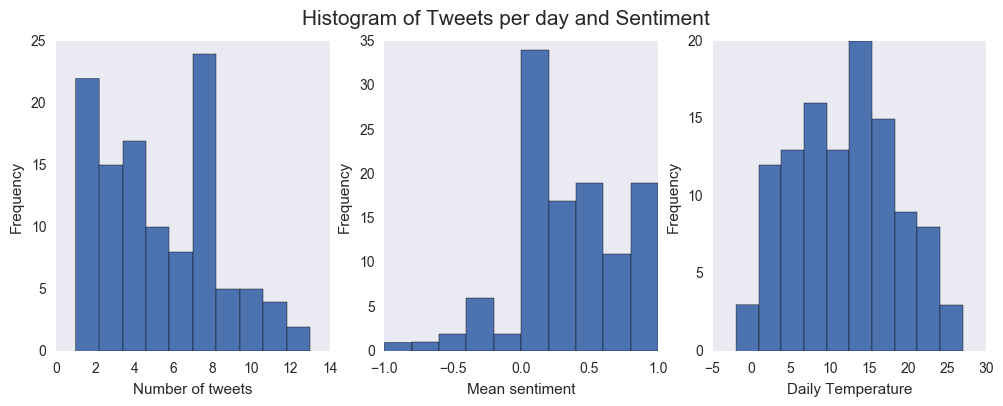

In [66]:
# Plot histogram of tweets, sentiment and the temperature

fig, ax = plt.subplots(1,3, figsize = (12,4))
df_master["Tweets"].plot(ax = ax[0], kind = "hist")
df_master["Sentiment"].plot(ax = ax[1], kind = "hist")
df_master["Temperature"].plot(ax = ax[2], kind = "hist")
ax[0].set_xlabel("Number of tweets")
ax[1].set_xlabel("Mean sentiment")
ax[2].set_xlabel("Daily Temperature")
fig.suptitle("Histogram of Tweets per day and Sentiment", size = 15)

The histograms above show the distribution of the data. The **leftmost histogram** shows the distribution of the number of tweets. As the figure shows, on a daily basis, Trump tweets either 1 or 7 tweets most frequenty. Otherwise we see that the number of tweets per day declines. This is an interesting histogram, especiall since one would expect the data to be skewed towards lower values, but it seems that Trump has a tendency to write 7 tweets per day, which he did for 24 days since 20th of January. The **histogram in the middle** shows the frequency of the mean daily sentiment for the tweets. It seems that mostly his tweets have been categorized as neutral, where we see a large increase in the frequency. To the left of the 0 value are the days where negative sentiments prevailed, of which we can see there are only a few. To the right we see more positive sentiment, which seems to be more frequent. I suspect that the sentiment analysis offered by TextBlob does not pick up the subtle meaning of the tweets, and often confuses Trump's "big" words for positive sentiment. Finally, **the right-most histogram** Shows us the daily temperatures. It seems that DC has experienced normal temperatures for the spring, which can be seen from the roughly normal distribution of the data. 

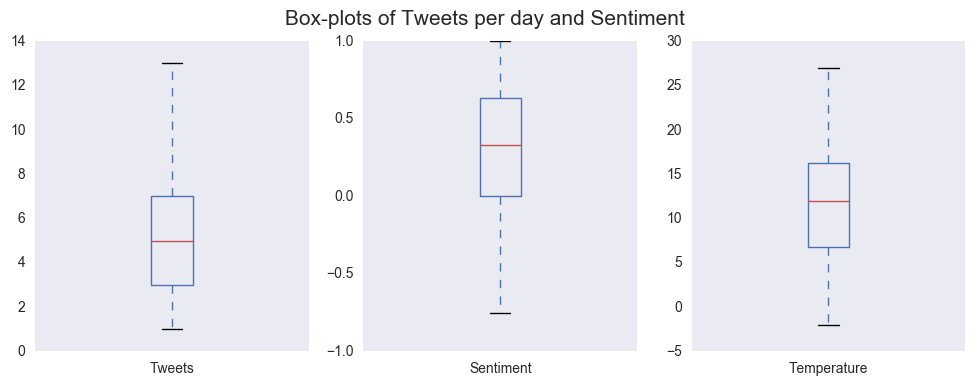

In [67]:
# Box plots of tweets, sentiment and temperature

fig, ax = plt.subplots(1,3, figsize = (12,4))
df_master["Tweets"].plot(ax = ax[0], kind = "box")
df_master["Sentiment"].plot(ax = ax[1], kind = "box")
df_master["Temperature"].plot(ax = ax[2], kind = "box")
fig.suptitle("Box-plots of Tweets per day and Sentiment", size = 15)

The box-plots correspond to the same three data points as above. As we can see, the **left-most** box-plot shows us the median number of tweets, the 25th and 50th percentile, as well as the minimum and maximum number of tweets. It seems that the median number of tweet is about 5 per day, and the minimum is 1 (which means that Trump tweeted every day), and the maximum is 13 (!). In case of the sentiment, shown in the **middle** box-plot, Trump's "median" sentiment is around 0.35, while his maximum sentiment per day is positive (1) and his minimum sentiment does not reach -1. Finally, **right-most** box-plot shows us the temperatures (in degrees Celsius) the media temperature was 12 degrees, the maximum was about 27 and the minimum was a bit below 0, around -3 degrees.

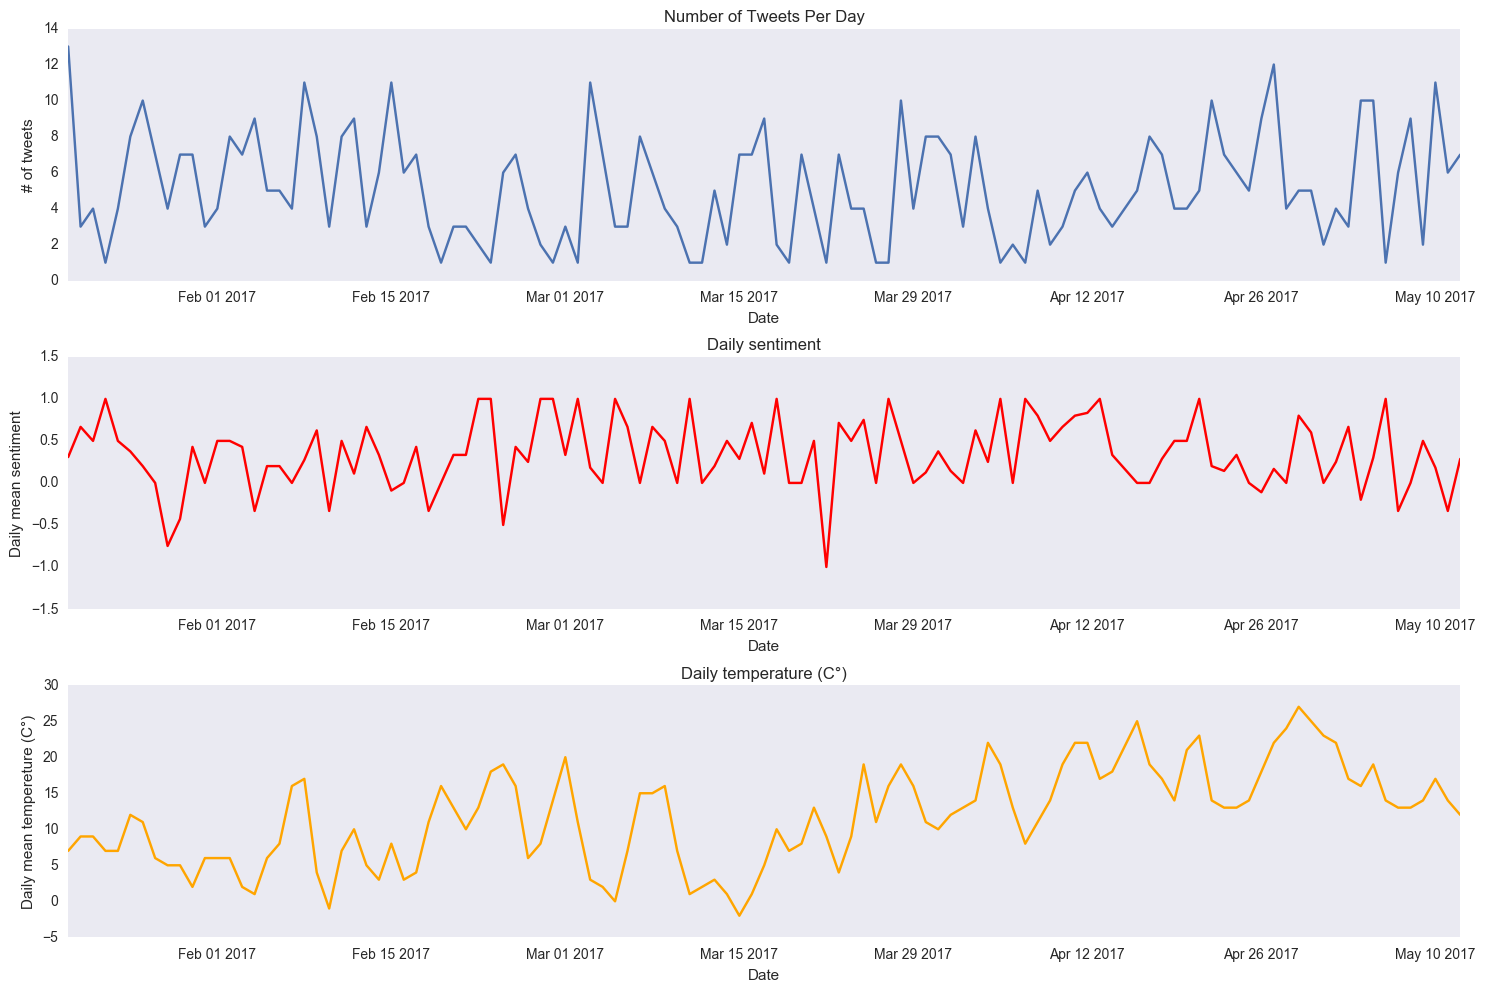

In [68]:
# Timeseries plots of tweets, sentiment and temperature 

fig, ax = plt.subplots(3,1, figsize = (15,10))
df_master["Tweets"].plot(ax = ax[0])
df_master["Sentiment"].plot(ax = ax[1], color = "red")
df_master["Temperature"].plot(ax = ax[2], color = "orange")
ax[0].set_title("Number of Tweets Per Day")
ax[1].set_title("Daily sentiment")
ax[2].set_title("Daily temperature (C°)")
ax[1].set_ylim([-1.5, 1.5])
ax[0].set_ylabel("# of tweets")
ax[1].set_ylabel("Daily mean sentiment")
ax[2].set_ylabel("Daily mean tempereture (C°)")
fig.tight_layout()

The time series plots for the different datapoints show some interesting treds. The first plot shows the time series of the number of tweets per day that Trump has tweeted. This plot shows that the number of tweets per day is fairly volatile - Some days Trump tweets out some 10 tweets or so, on other days, it's calmer and he writes only a few tweets. The second time series plot shows his tweets' sentiment for each day, which is equally volatile, albeit has a mean above zero. Some days Trump tweets positive messages, on other days his tweets are net neutral (that is, the aggregate of his sentiment adds up to 0) and occasionally he is negative. The third, bottom time series shows the daily average temperature for our desired dates, and we can see that there has been a bit of fluctuation, albeit temperatures have been rising overall (as expected).

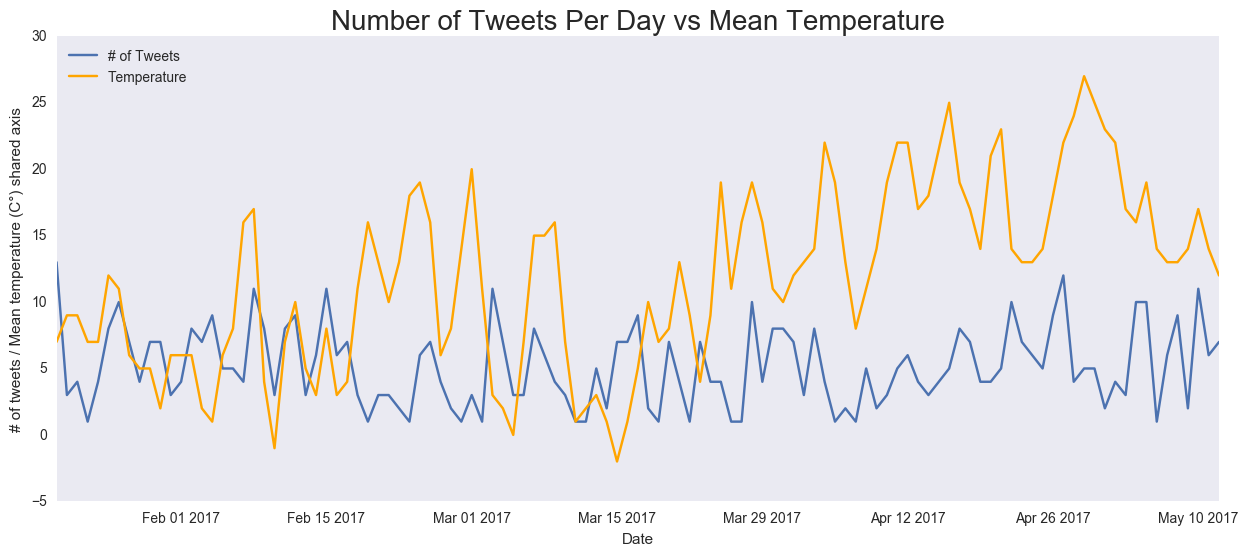

In [69]:
# Plotting tweets and temperature together

fig, ax = plt.subplots(figsize = (15,6))
df_master["Tweets"].plot(ax = ax)
df_master["Temperature"].plot(ax = ax, color = "orange")
ax.set_title("Number of Tweets Per Day vs Mean Temperature", size = 20)
ax.set_ylabel("# of tweets / Mean temperature (C°) shared axis")
ax.legend(["# of Tweets", "Temperature"], loc = "best")

Here I plot the number of tweets versus the daily average temperature. We can see that there is no clear pattern by which we could map one or the other, even though at some points the number of tweets do closely move together with the temperature rise and fall, this close movement is off-set by some days where its completely divergent. One explanation for this is that there is no correlation between the two datasets, while the other is that (potentially), the divergence is due to the fact that Trump was not in DC on those occasions (let's remember, Trump spent a few weekends in Mar-A-Lago). This divergence is not necessarily well-picked up in the data. 

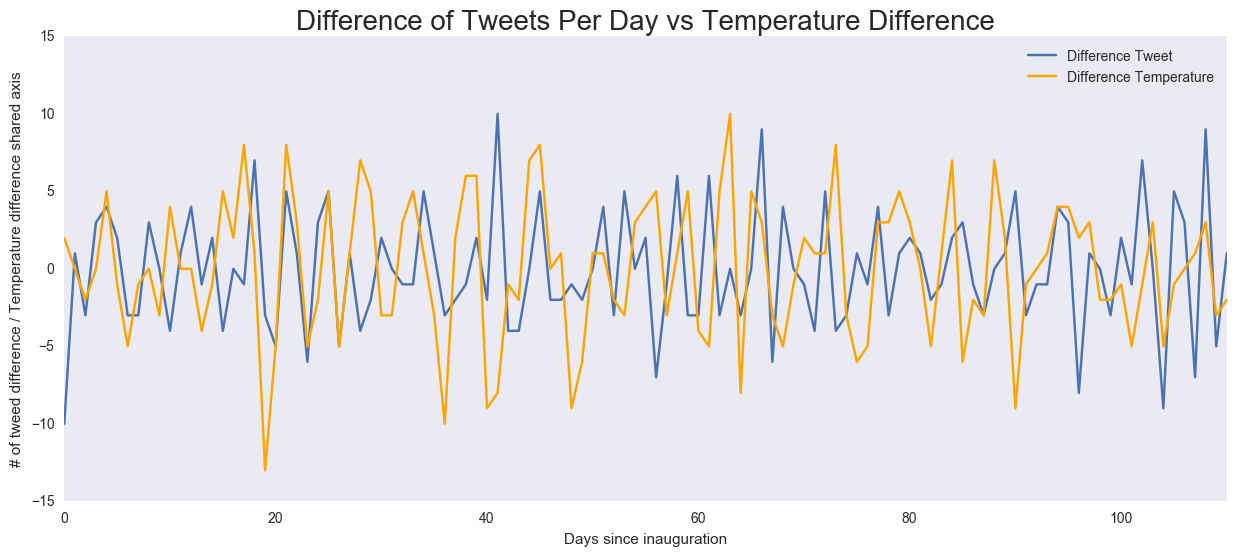

In [70]:
# Plotting tweet and temperature difference together

fig, ax = plt.subplots(figsize = (15,6))
df_diff["Tweet_diff"].plot(ax = ax, label = "Tweet number difference" )
df_diff["Temp_diff"].plot(ax = ax, color = "orange", label = "Difference temperature")
ax.set_ylabel("# of tweed difference / Temperature difference shared axis")
ax.set_xlabel("Days since inauguration")
ax.set_title("Difference of Tweets Per Day vs Temperature Difference", size = 20)
ax.set_ylim([-15, 15])
ax.legend(["Difference Tweet", "Difference Temperature"], loc = "best")

Another way of looking at the time series is by looking at the difference of temperature and number of tweets tweeted. This is an interesting time series plot, especially since Trump's tweets (blue line) seem to be very much like "white noise", that is to say that they have no clear pattern and move along an average, which seems to be 0 (or maybe it's just chaos, or a martingale difference). The orange line, the change in mean temperature, is also wildly fluctuating. The plot above shows no clear trend or co-movement between the datasets.

# Regression analysis and correlation

In this section I will look at whether there is some form of statistically significant relationship between the tweets sentiment and the other variables, namely the number of tweets, temperature, snow (binary), fog (binary), rain (binary) and temperature times tweets, an interaction variable showing if respective magnitudes affect each other.

In [71]:
# Pair-wise correlation table for all variables

df_master.corr(method = "pearson")

,Tweets,Sentiment,Temperature,Snow,Fog,Rain,Temp_x_tweets
Tweets,1.000000,-0.288122,-0.020177,-0.008527,-0.102066,0.001084,0.650179
Sentiment,-0.288122,1.000000,0.100853,-0.086288,0.098998,0.113682,-0.137912
Temperature,-0.020177,0.100853,1.000000,-0.341946,-0.178666,0.163757,0.664081
Snow,-0.008527,-0.086288,-0.341946,1.000000,0.413215,0.064889,-0.243074
Fog,-0.102066,0.098998,-0.178666,0.413215,1.000000,0.153747,-0.182666
Rain,0.001084,0.113682,0.163757,0.064889,0.153747,1.000000,0.145982
Temp_x_tweets,0.650179,-0.137912,0.664081,-0.243074,-0.182666,0.145982,1.000000


The table above shows us a pair-wise comparison of the Pearson correlations in the data. Obviously, the same data points show perfect correlation. In general, there doesn't seem to be any significantly strong correlation between the weather effects and the sentiment or the number of tweets, correlations averaging around 0.1 (absolute value), which shows very weak correlation. A somewhat more strong correlation can be observed between the number of tweets and sentiment, which shows that the higher the number of tweets, the lower the sentiment. This could be due to two things. Either Trump tweets more as his sentiment goes down, or that as he tweets more, the net sentiment goes down since more "sentiment" values are added to the aggregate daily sentiment value. In other words, this pairwise comparison does not necessarily show us causation or the direction of the effect at this point.

In [72]:
# Pair-wise correlation table for differences

df_diff.corr(method = "pearson")

,Tweet_diff,Temp_diff,Sentiment_diff
Tweet_diff,1.000000,0.101791,-0.157920
Temp_diff,0.101791,1.000000,-0.000776
Sentiment_diff,-0.157920,-0.000776,1.000000


Another pair-wise comparison of the correlation of the differences shows that there is no strong correlation in the data, with correlations not being greater than 0.2 (absolute value). The sign of the correlation is interesting, in the sense that when there is less temperature swing (difference) there are less tweets written but on the other hand, as the temperature swings up, the tone of the tweets moves in the opposite direction (albeit with an extremely tiny correlation).

In [73]:
# Regression analysis of df_master dataframe variables

result = sm.ols(formula="Sentiment ~ Temperature + Tweets + Snow + Rain + Fog + Temp_x_tweets", data=df_master).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     2.427
Date:                Fri, 12 May 2017   Prob (F-statistic):             0.0309
Time:                        13:16:30   Log-Likelihood:                -52.958
No. Observations:                 112   AIC:                             119.9
Df Residuals:                     105   BIC:                             138.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.3800      0.174      2.189

This regression analysis shows us how the different weather variables and tweets interact with our independent variable, which is the sentiment aggregate per day. Notably, none of the variables are statistically significant (with the exception of the intercept), which means that none of the variables are statistically significant from 0 (exemplified in the 95% confidence intervals).

In [74]:
# Regression analysis of differences

result1 = sm.ols(formula="Sentiment_diff ~ Temp_diff + Tweet_diff", data=df_diff).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:         Sentiment_diff   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.395
Date:                Fri, 12 May 2017   Prob (F-statistic):              0.252
Time:                        13:16:31   Log-Likelihood:                -96.791
No. Observations:                 111   AIC:                             199.6
Df Residuals:                     108   BIC:                             207.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0016      0.056     -0.029      0.9

This regression above regresses the difference variables, which shows that there is one statisticall significant variable, namely the difference in tweets, at 90% statistical significance. This would mean that a difference in tweets of 1 leads to a 0.0244 decrease in the difference of sentiment. In other words, the more different the number of tweets day to day, the less different the sentiment. 

C:\Users\Norbert Monti\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


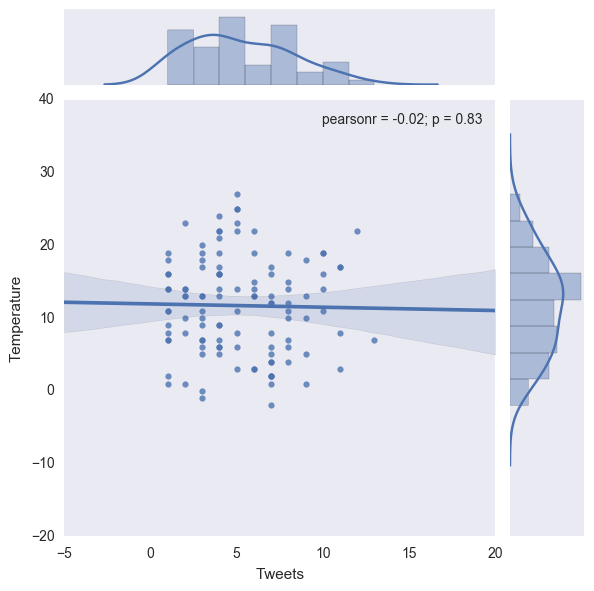

In [75]:
# Joint plot of tweets and temperature

g = sns.jointplot("Tweets", "Temperature", data=df_master, kind="reg", size=6)

To further reiterate the correlation (or lack thereof) within the data, here is a joint plot of the distribution and a scatter plot of the data for the number of tweets and the temperature. This shows that there is a very tiny negative correlation of -0.027.

C:\Users\Norbert Monti\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


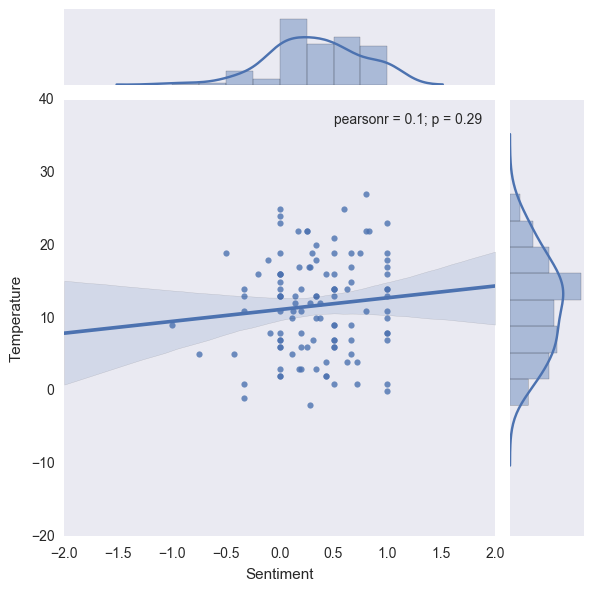

In [76]:
# Joint-plot of sentiment and temperature

h = sns.jointplot("Sentiment", "Temperature", data=df_master, kind="reg", size=6)

Another joint plot shows that there is no "strong" correlation between the temperature and the sentiment of tweets, albeit the direction of the correlation is positive, which can also be observed from the slightly upward sloping trend line on the graph. 

# Implications

What are the implications of these findings? Albeit at first sight it might be tempting to be disappointed with the statistically not significant results, it also shows us that Trump's tweeting habits, and mood is not affected by the weather. Which also implies that he might not have mood swings related to the weather. Therefore, we can make an inference that Trump's tweeting habits are not related to his mood, but another variable that was not included in this dataset. In fact, it might be very interesting to look further for variables which better explain his tweets, sentiment and number alike, such as approval and disapproval ratings and media coverage especially. What might be an interesting thing to look at is negative media coverage: heuristically it might be observed that in the last few days he wrote more tweets in the wake of the Sally Yates comments and James Comey's firing, using Twitter as a platform to express his dissatisfaction with the media's coverage of his decision, and annoyance with the opposition's reaction. 

Given that the number of tweets and the sentiments of these tweets shows no trend, and thus could be viewed as white noise, it made me think whether Trump uses the platform as a sort of "smoke and mirrors", political white-noise generator, where he can distract the public and himself from something that has negatively affected him. In fact there may lie an interesting research idea, on whether he deliberately creates this white noise, the insults and bragadoccio behaviour to take away people's attention from the details, polarizing the public with his tweets. If this is the case, it might point to a more sophisticated use of Twitter which looks beyond simple erratic, and irrational use of such. If his tweeting habits are rational, or in fact somehow strategic, furthe inquiry into this might reveal some form of pattern, which can later be generalized.

# Evaluation and Conclusion

This project set out to look at the relationship between weather affected mood-swings and Trump's tweeting habits. One of the tenets of the research was to look into whether somehow Trump's seemingly irrational tweeting habits could be explained by the weather, which is a variable known to affect people's mood. I set out to create two databases from Twitter data, as well as historical weather data for Washington DC. After creating two datasets, one with the historical values, and one with the difference of values from day to day, we looked at different descriptive statistics and time series plots to evaluate the data. One striking revelation from this data is that Trump's tweets (both sentiment and number) is extremely volatile, and can have relatively large jumps from day to day. This is also showcased in the difference of the number of tweets and sentiments, a time series that has a haunting resemblence to white noise. The correlation in the data, as well as the regression analysis does not show any strong evidence of interaction, let alone statistically significant results for the data. While I was a bit disappointed by this, I need to remind myself that this shows that Trump's tweeting habits are not affected by the weather, which might mean that his mood is not affected by the weather. Which in turn might imply that he uses Twitter in a much more sophisticated way, in the sense that his use of Twitter is strategic and somehow related to political events. In this case, there needs to be a more thorough inquiry into this subject. I suspect that he might use twitter as a "smoke and mirrors", white-noise generator to distract his opponents and the public, or to swing his loyal base to himself by dictating the course of the debate.

In terms of the characteristics of the research there are some serious shortcomings that would be great to overcome if I were to re-do (enhance) this project in the future. Firstly, the sentiment analysis is naive, and does not pick up much of the toxicity of the tweets that a human reading might do - this is due to the fact that most of his tweets were categorized as positive because they contain a language that implies grandiosity (such as great, safe, wonderful etc.). Therefore, the sentiment analysis contained here is mostly flawed. The second shortcoming is the fact that through his tweets we were unable to closely track where he exactly is: even though I made the assumption that Trump resides in the White House, it is known that he has been moving around to Mar-A-Lago on weekends, as well as to New York and other states over the 100+ days of is presidency. In this case, the weather variables contained in the dataset are not of any use of us, and might actually change the analysis in ways that it makes it incorrect. 

Nonetheless, I believe that there is scope in looking in more detail into his tweets, especially since they show some peculiar trends of "no trend" and large volatility, which in some form might imply that he uses the platform in a more sophisticated way that one might expect (as crazy as it sounds). So far it seems that most of the talk about his Twitter account has been based on stock movements and on foreign exchange movements, related to how he mentioned companies and countries. But while his comments explain financial volatility in certain cases, what explains his volatility? This will be a question for a new, more in-depth research, one that might promise to explain Trump's motivations in his tweets.